#### Kewei XU
#### 3776215

In [8]:
import os
import shutil  

import cv2
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

from LoadData import loadData
from SDM import SDM
from Tools import showData_1, display_10_1, showData_2, display_10_2, calculateError


In [9]:
dataset = loadData()

In [10]:
#train dataset load (1m 30s)
dataSetPath = "F:/M2/VISION/Facial detection/data/300w"
imgListFileName = "300w_train_images.txt"
lmkListFileName = "300w_train_landmarks.txt"

dataset.loadDataSet(dataSetPath, imgListFileName, lmkListFileName, isTrainset=True)

In [11]:
#test dataset load (15s)
dataSetPath = "F:/M2/VISION/Facial detection/data/300w"
imgListFileName = "helen_testset.txt"
lmkListFileName = "helen_testset_landmarks.txt"

dataset.loadDataSet(dataSetPath, imgListFileName, lmkListFileName, isTrainset=False)

### 1.2 Data visualisation

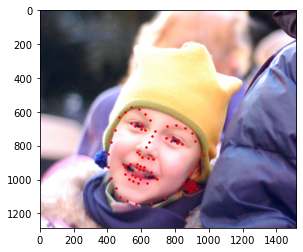

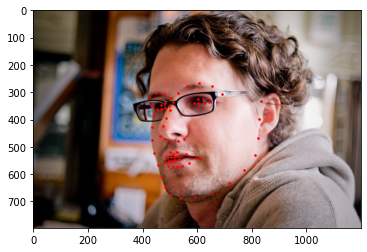

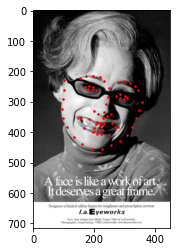

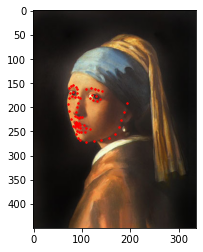

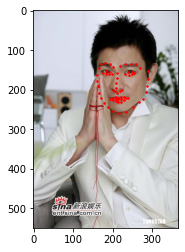

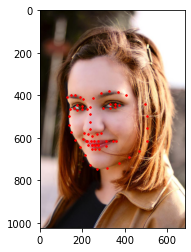

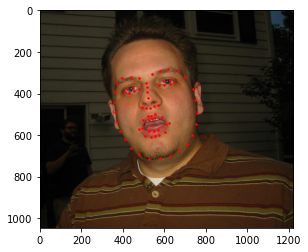

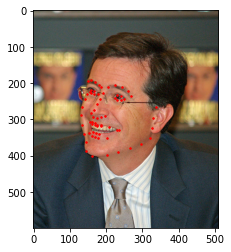

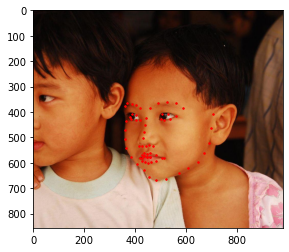

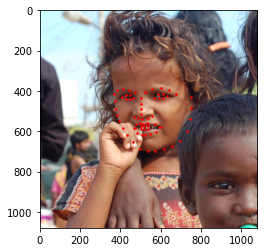

In [12]:
#display 10 random images with landmarks in train set
display_10_1(dataset.train_imgs, dataset.train_lmks)

### 1.3 Data augmentation

In [13]:
#optimize dataset
dataset.optimizeData(128, 128)

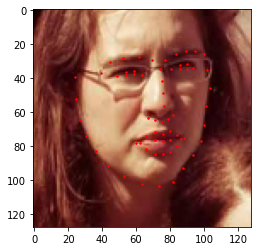

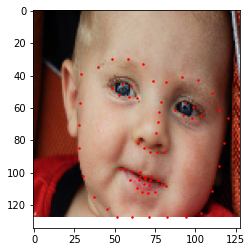

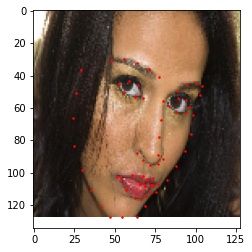

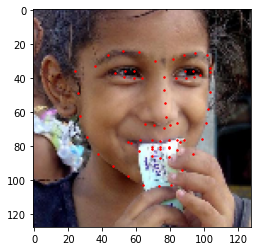

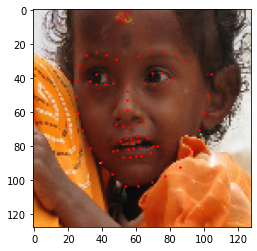

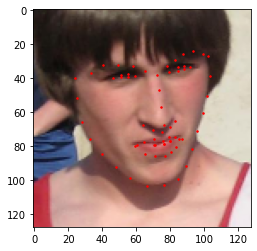

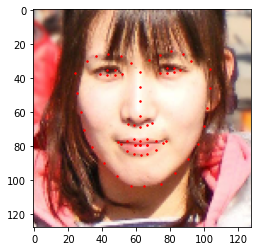

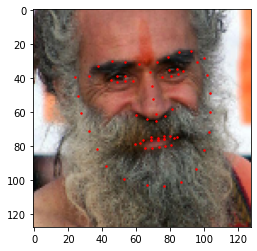

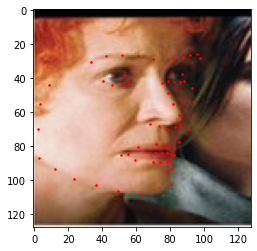

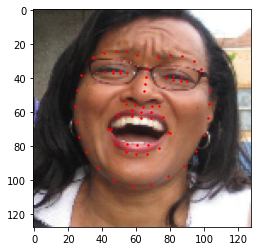

In [14]:
#display 10 random images with landmarks in train set
display_10_1(dataset.train_imgs, dataset.train_lmks)

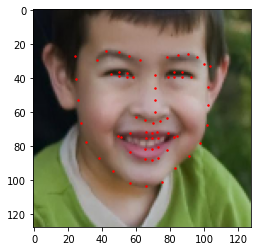

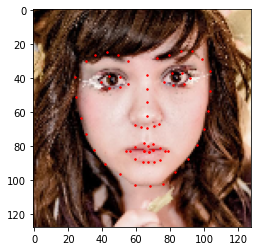

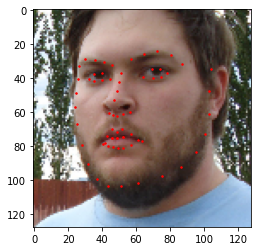

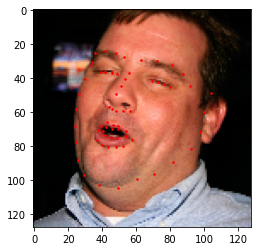

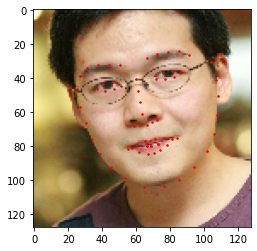

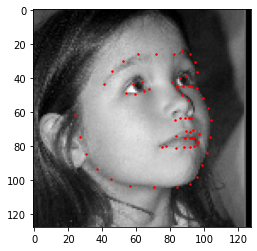

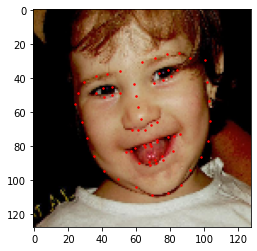

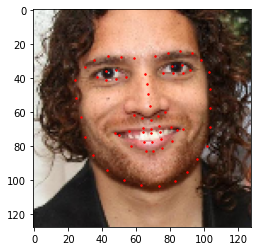

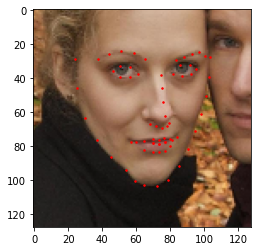

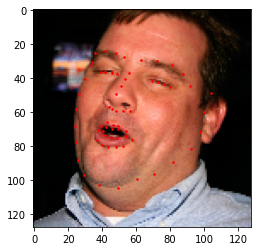

In [15]:
#display 10 random images with landmarks in test set
display_10_1(dataset.test_imgs, dataset.test_lmks)

In [16]:
#compute mean and generate perurbs
dataset.computeMeanLmk() # compute mean on training set
dataset.generatePerurbs(nbPerurb=10, bias_t=10, bias_s=0.1) # compute perurbations

In [17]:
#save data on the disk
savepath = "F:/M2/VISION/Facial detection/data/prepared"
filename = "cred"
if os.path.exists(savepath):
    shutil.rmtree(savepath)
train_datapath = dataset.saveData(savepath, filename, isTrainset=True)
test_datapath = dataset.saveData(savepath, filename, isTrainset=False)
mean_path, perurb_path = dataset.saveMeanAndPerurbs(savepath, filename)

In [18]:
#load prepared data
dataset.loadPredData(train_datapath[0], train_datapath[1], setToGray=True, isTrainset=True)
dataset.loadPredData(test_datapath[0], test_datapath[1], setToGray=True, isTrainset=False)
dataset.loadMeanAndPerurbs(mean_path, perurb_path)

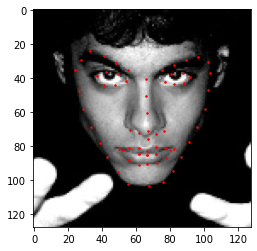

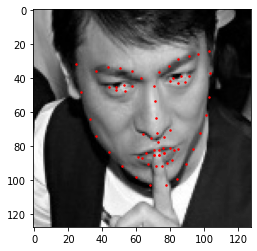

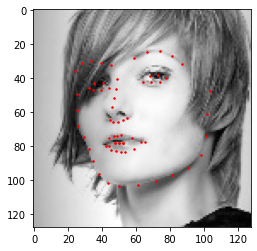

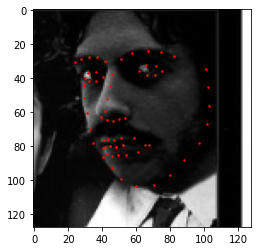

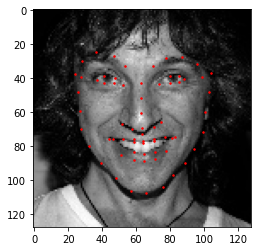

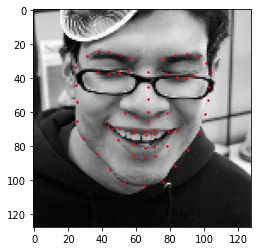

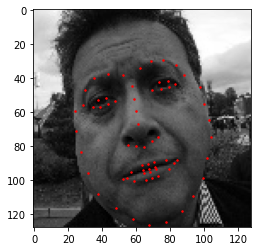

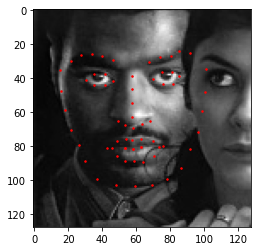

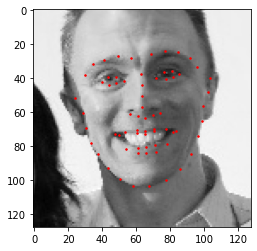

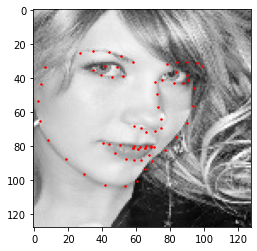

In [19]:
#display 10 random images with landmarks in test set
display_10_1(dataset.train_imgs, dataset.train_lmks)

In [20]:
print(dataset.train_imgs.shape)
print(dataset.train_lmks.shape)
print(dataset.mean.shape)

(3148, 128, 128)
(3148, 68, 2)
(68, 2)


In [21]:
# our dataset load correctly, and now prepare our dataset to train
train_imgs_set, train_lmks_set, train_means_set = dataset.augmentDataset(isTrainset=True)
test_imgs_set, test_lmks_set, test_means_set = dataset.augmentDataset(isTrainset=False)
print(train_imgs_set.shape)
print(train_lmks_set.shape)
print(train_means_set.shape)
print(test_imgs_set.shape)
print(test_lmks_set.shape)
print(test_means_set.shape)

(34628, 128, 128)
(34628, 68, 2)
(34628, 68, 2)
(330, 128, 128)
(330, 68, 2)
(330, 68, 2)


###### Q5. Why do we generate these perturbations? How could they be estimated automatically?
###### A5. We generate these perturbations in order to increase samples in our trainset to get a more robust model. They could be estimated automatically by sampling from a normal destribution.

### 2 Training of a single regressor

##### 2.1 Feature extraction

###### Q1. Why do we not directly use the raw value of the image pixels as a representation ?

###### A1. Because we want to use a robust feature to preset the landmarks

###### Q3. Use the OpenCV sift.compute function to compute a SIFT feature around each landmark. What is the dimension of each feature?
###### A3. 128

###### Q4. For each image, concatenate all the computed features from each landmarks. What is the dimension of this feature vector?
###### A4. 128 * 68 = 8704

##### 2.2 Dimensionality reduction

###### Q1. What is the main interest of this dimensionality reduction? Could you cite some other dimensionality reduction methods for machine learning?
###### A1. We want to reduce the number of feature in order to make the computation more faster.  Ex: Linear Discriminant Analysis(LDA)

###### Q3. What are the dimensions of the new resulting matrix $\tilde{X}_0$ ?
###### A3. $\tilde{X}_0 \in \mathbb{R}^{M^{'} \times N}$ where $M^{'} = 599$ (number of feature after PCA) $N = 3148$ (number of sample)

##### 2.3 Displacement estimation

------------ start training ------------
--- 1 epoche start ---
sift done!
pca done!
compute R done!
--- 1 epoche end ---


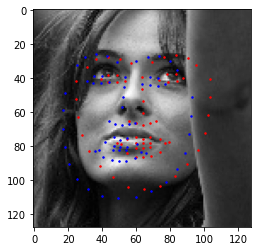

--- 2 epoche start ---
sift done!
pca done!
compute R done!
--- 2 epoche end ---


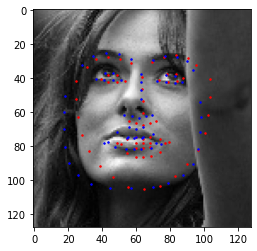

--- 3 epoche start ---
sift done!
pca done!
compute R done!
--- 3 epoche end ---


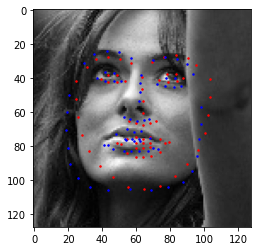

--- 4 epoche start ---
sift done!
pca done!
compute R done!
--- 4 epoche end ---


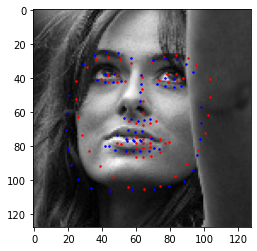

--- 5 epoche start ---
sift done!
pca done!
compute R done!
--- 5 epoche end ---


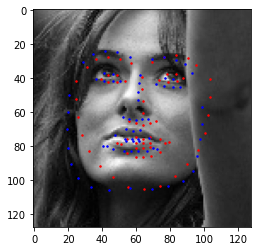

------------ end training ------------


In [22]:
# start to train
sdm = SDM()
sdm.patchSize = 20 # sift patch size
sdm.fit(train_imgs_set, train_means_set, train_lmks_set, nIter=5)
# red(initial)
# blue(predict)

In [23]:
print("Prediction error (mean square error) of training set in each iteration: ")
print(sdm.Es_tr)

Prediction error (mean square error) of training set in each iteration: 
[37.96344414854285, 12.1504703328358, 7.538010492351195, 6.918570027542811, 6.685488894404199]


###### Q2. What can we conclude ?
###### A2. According to the result of display and predict error, we can see that the error is reducing in each iteration, and keypoints of predict is approching to the ground truth.

In [24]:
# start to test
sdm.predict(test_imgs_set, test_means_set)
predict_lmks = sdm.predictLmks

------------ start predicting ------------
--- 1 epoche start ---
sift done!
predict done!
--- 1 epoche end ---
--- 2 epoche start ---
sift done!
predict done!
--- 2 epoche end ---
--- 3 epoche start ---
sift done!
predict done!
--- 3 epoche end ---
--- 4 epoche start ---
sift done!
predict done!
--- 4 epoche end ---
--- 5 epoche start ---
sift done!
predict done!
--- 5 epoche end ---
------------ end predicting ------------


In [25]:
print(test_lmks_set.shape)
print(predict_lmks.shape)

(330, 68, 2)
(330, 68, 2)


In [26]:
# calculate square errors
calculateError(test_lmks_set, predict_lmks)/len(test_lmks_set)

32.10953512095874

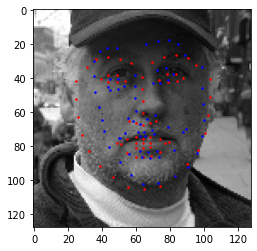

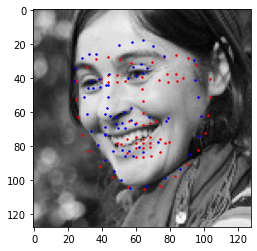

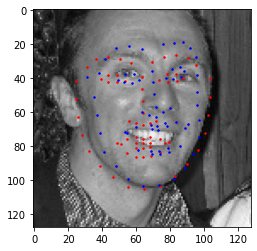

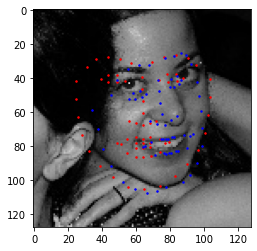

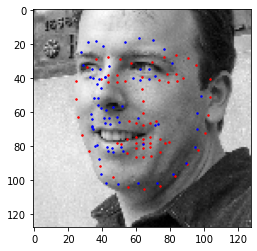

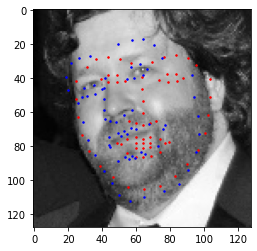

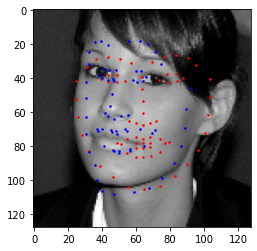

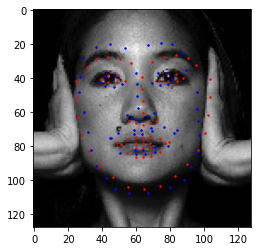

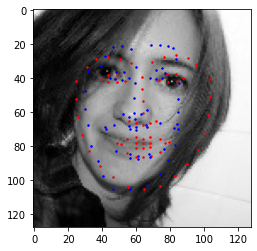

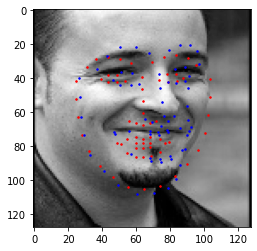

In [27]:
display_10_2(test_imgs_set, test_means_set, predict_lmks)
# red(initial)
# blue(predict)

###### Q4. What can we conclude ?
###### A4. The face in forward which ground truth is close to mean, can be predict a little bit will. On the other hand, maybe we can increase our dataset or number of iteration to get a better result of predict.